# Bike-Sharing Case Study

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Objective:***

- To develop a linear model with the available independent variables that quantitatively relates factors affecting the demand for these shared bikes in the American market.

- The model will drive the business strategy to meet the demand levels and meet the customer's expectations.

- The model will used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


## Step 1: Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# NumPy and Pandas libraries to read the dataset
import numpy as np
import pandas as pd

# Matplotlib and Seaborn libraries to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn libraries for data set split and rescaling data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Importing sklearn libraries for linear model building
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 2: Reading and Understanding the Data

In [3]:
df = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check the axes of data
df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [9]:
#check the values of data
df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

#### _`Inference`_: There are 730 rows and 16 columns in the data set.

## Step 3: Cleaning Data

#### 3.1 Drop columns that are not useful for analysis

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [10]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the boom bikes business
df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [11]:
#Inspect once
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [12]:
# Droping instant column as it is index column, hence not relevant for analysis
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday since we already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [13]:
#Inspect data frame after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


#### 3.2 Handle Missing values

In [14]:
#Print null counts by column
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _`Inference`_: There are no null values.

#### 3.3 Handling Outliers

In [15]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

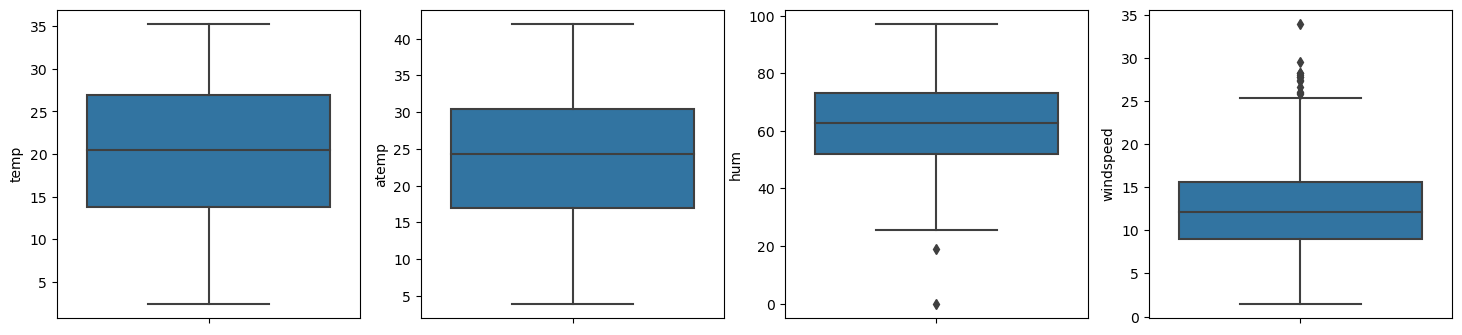

In [16]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### _`Inference`_: From these plots, we can see there are no outliers to be handled.

In [17]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [18]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [19]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


#### _`Inference`_:
- Features like `season, mnth, weekday and weathersit` are integers although they should be non-numerical categories.

#### 3.4 Convert `season, mnth, weekday and weathersit` to categorical types

In [20]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


## Step 4: Visualising the Data

#### 4.1 Visualising Numeric Variables

<Figure size 1500x3000 with 0 Axes>

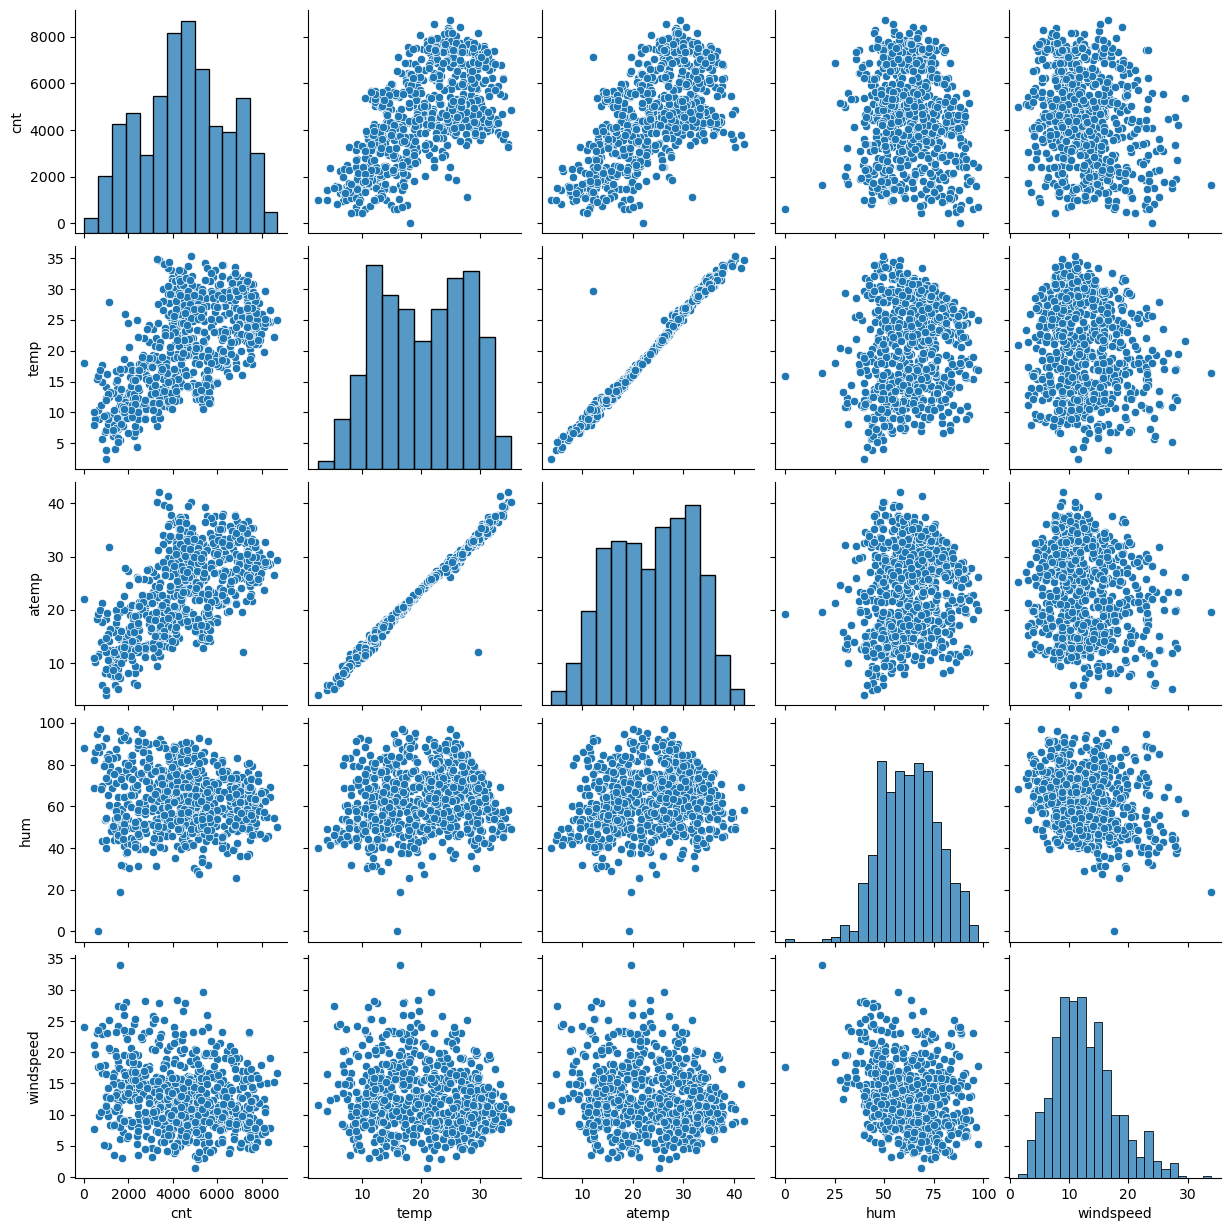

In [21]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### _`Inference`_: 
- Looks like the `temp` and `atemp` has the highest corelation with the target variable cnt
- `temp` and `atemp` are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

#### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

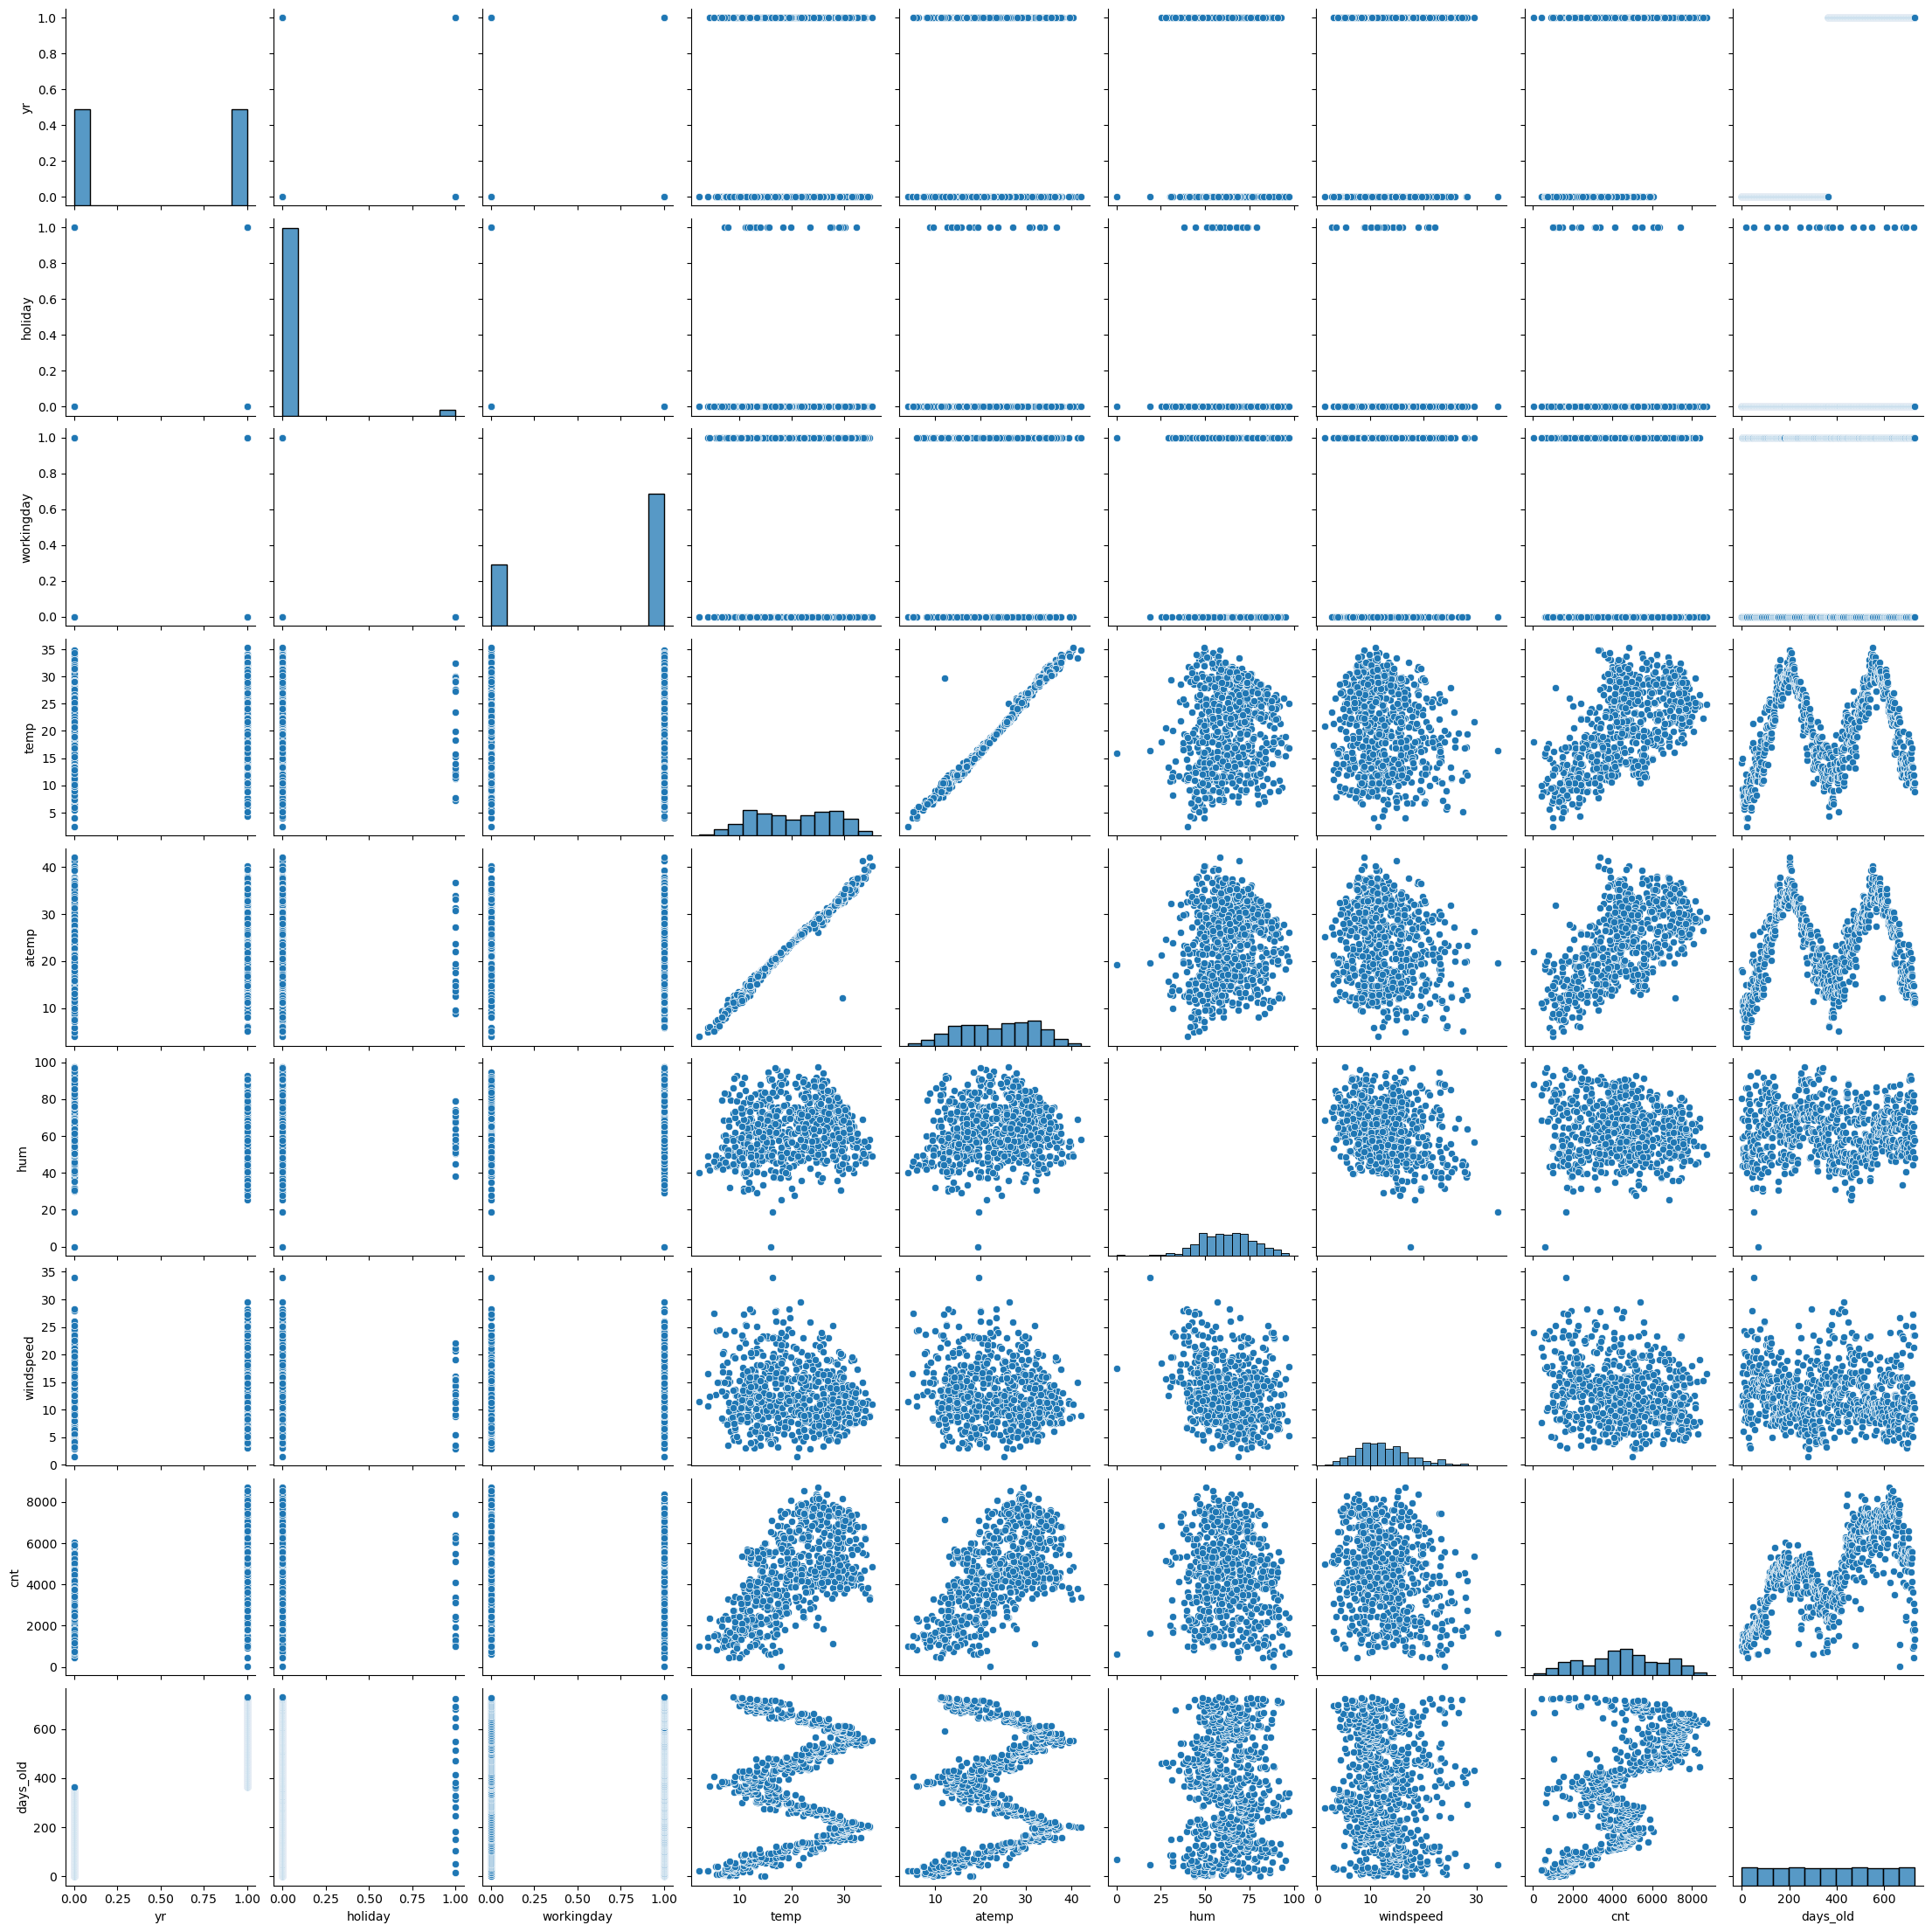

In [22]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

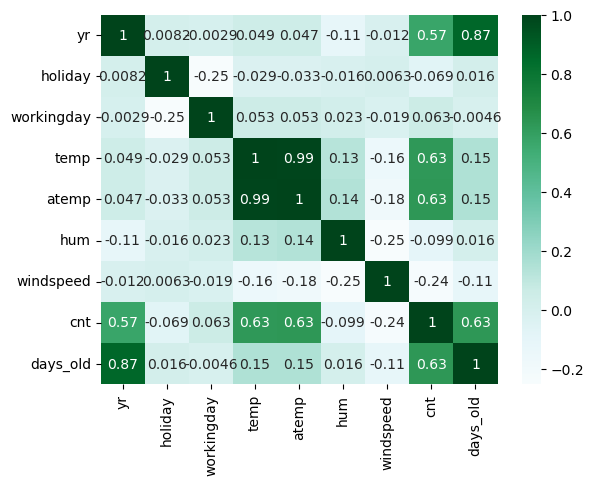

In [23]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt','days_old']].corr(), cmap='BuGn', annot = True)
plt.show()

#### _`Inference`_:
- Here we see that `temp` and `atemp` has correlation more than .99 means almost 1 (highly correlated). `atemp` seems to be derived from `temp` so `atemp` column can be dropped
- From the correlation map, `temp`, `temp` and `days_old` seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
- Target variable `cnt` has a linear relationship with some of the independent variables. Good sign for building a linear regression Model.

#### 4.2 Analysing Categorical Variabels with target variables 

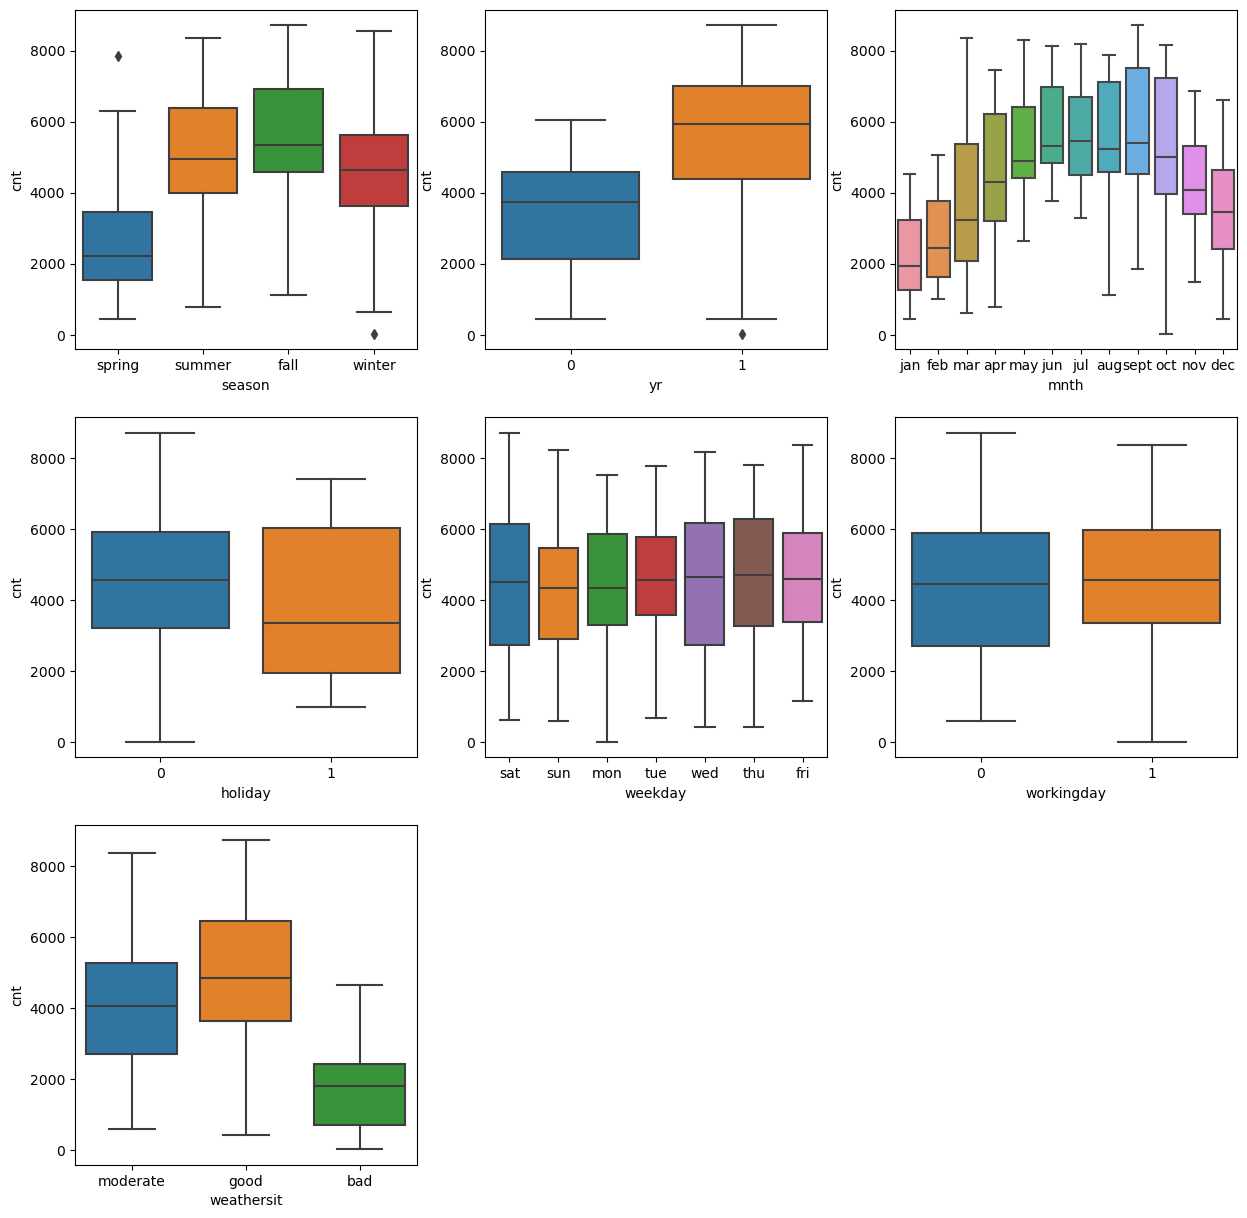

In [24]:
# Boxplot for categorical variables to see demands
cat1 = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat1):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
-  Fall season has highest demand for rental bikes.
- Demand for next year has grown.
- Demand is continuously growing till June, September month has highest demand. However after September, demand is decreasing.
- During holidays, demand has decreased.
- The clear weathersit has highest demand.
- During September, bike sharing is more. During the end and beginning of year, it is less.

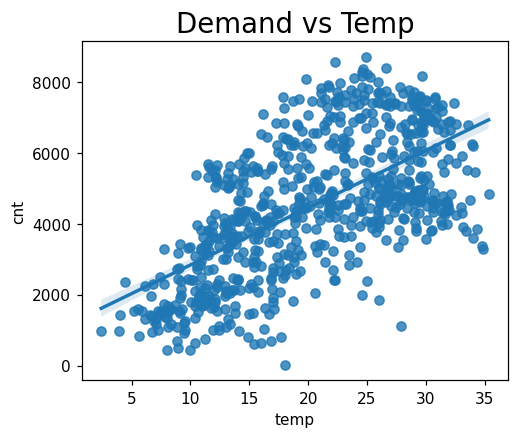

In [25]:
plt.figure(figsize=(5,4),dpi=110)
plt.title("Demand vs Temp",fontsize=18)
sns.regplot(data=df,y="cnt",x="temp")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to `temp`.
- We can see that `cnt` is linearly increasing with temp indicating linear relation.

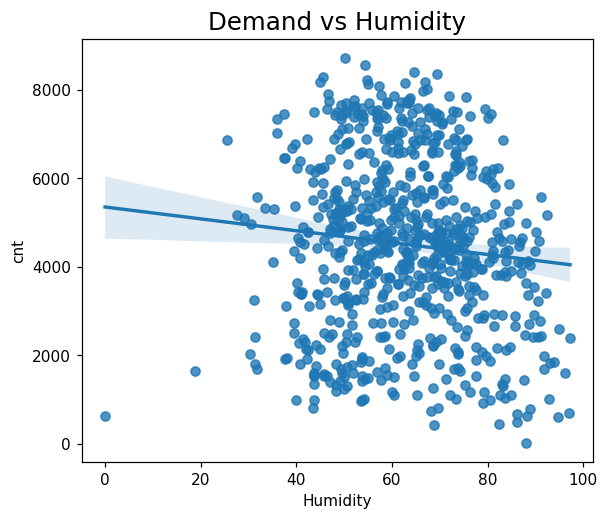

In [26]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Demand vs Humidity",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- We can see `cnt` decreasing with increase in humidity.

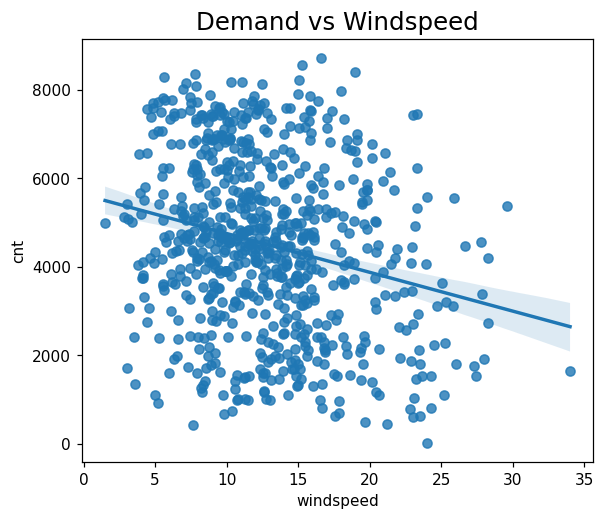

In [27]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Demand vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- We can see `cnt` decreasing with increase in windspeed.

## Step 5: Data Preparation

#### 5.1 Create dummy variables for all categorical variables

In [28]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.

In [29]:
#Updated Columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,True,False


## Step 6: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
- Using Min-Max scaling 

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns 
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.505414
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.288281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.510989
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.759272
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 7: Building a linear model using RFE and Automated approach

#### 7.1 Use RFE to eliminate some columns

In [36]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lm,n_features_to_select= 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 9),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### 7.2 Manual elimination

##### Creating Function to build a linear model using statsmodel api

In [39]:
# Takes the columns to be selected for model as a parameter and print summary of fitted model
def lr_model (cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lr.summary())
    return lr

##### Creating Function to calculate VIFs and print them

In [40]:
# Takes the columns for which VIF to be calcualted as a parameter and print the calculated VIF
def calculate_vif(cols):
    dt = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = dt.columns
    vif['VIF'] = [variance_inflation_factor(dt.values.astype(np.float64), i) for i in range(dt.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### We will start with the RFE selected columns for manual elimination

In [41]:
#Print Columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [42]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'days_old', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [43]:
# Taking 15 columns supported by RFE
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 
                       'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
                       'weathersit_moderate']]

In [44]:
X_train_rfe.shape

(510, 15)

### Step 8:  Building model 
 By eliminating features selected from RFE

#### Model 1 - Start with all variables selected by RFE

In [45]:
#Selected columns for Model 1 - all 15 columns selected by RFE
col1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']

lr_model(col1)
calculate_vif(col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.13e-191
Time:                        22:34:21   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1035    

#### Model 2

In [46]:
#Dropping the column holiday since it has high p-value
col2 = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']

lr_model(col2)
calculate_vif(col2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          8.51e-192
Time:                        22:34:21   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0966    

#### Model 3

In [47]:
#Dropping the column 'weathersit_good' since it has high VIF
col3 = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']


lr_model(col3)
calculate_vif(col3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          8.51e-192
Time:                        22:34:21   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2298    

#### Model 4

In [48]:
#Dropping the column 'hum' since it has high VIF
col4 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']

lr_model(col4)
calculate_vif(col4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.28e-189
Time:                        22:34:21   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1493    

#### Model 5

In [49]:
#Dropping the column 'workingday' since it has VIF at higher range 
col5 = ['yr', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']


lr_model(col5)
calculate_vif(col5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.37e-185
Time:                        22:34:21   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     498   BIC:                            -913.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1937    

#### Model 6

In [50]:
#Dropping the column 'windspeed' since it has VIF at higher range
col6 = ['yr', 'temp', 'season_spring', 'season_summer', 'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']

lr_model(col6)
calculate_vif(col6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          6.72e-179
Time:                        22:34:21   Log-Likelihood:                 476.36
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     499   BIC:                            -884.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1435    

#### Model 7

In [51]:
#Dropping the column 'season_summer' since it has VIF p-value
col7 = ['yr', 'temp', 'season_spring',  'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']

lr_model(col7)
calculate_vif(col7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          5.28e-179
Time:                        22:34:21   Log-Likelihood:                 473.75
No. Observations:                 510   AIC:                            -927.5
Df Residuals:                     500   BIC:                            -885.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1876    

#### Model 8

In [52]:
#'weekday_sat' has high p-value, Replacing the column 'weekday_sat' with 'weekday_sun' which was removed by RFE
col8 = ['yr', 'temp', 'season_spring',  'season_winter', 
        'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate']

lr_model(col8)
calculate_vif(col8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.75e-181
Time:                        22:34:21   Log-Likelihood:                 479.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1987    

#### `Inference`
Here VIF seems to be almost accepted for all variable is less than 5. p-value for all the features is  almost 0.0 and R2 is `0.822`
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

#### Final Model

In [53]:
cols = ['yr', 'temp', 'season_spring',  'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
        'weathersit_moderate']

X_train_final = sm.add_constant(X_train[cols])
lr_final= sm.OLS(y_train, X_train_final.astype(float)).fit()

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [54]:
y_train_cnt = lr_final.predict(X_train_final)

Text(0.5, 0, 'Errors')

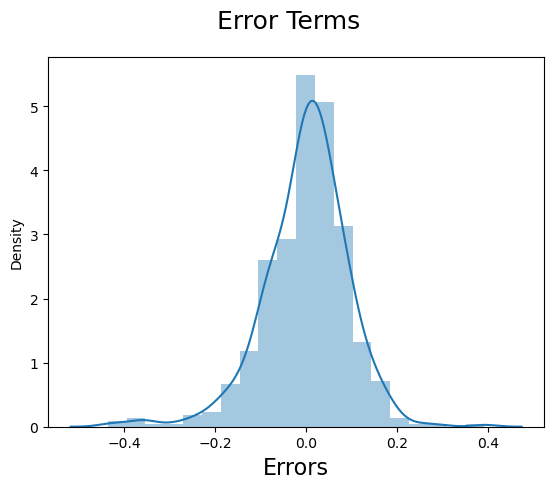

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label

- Errors are normally distribured here with mean 0.

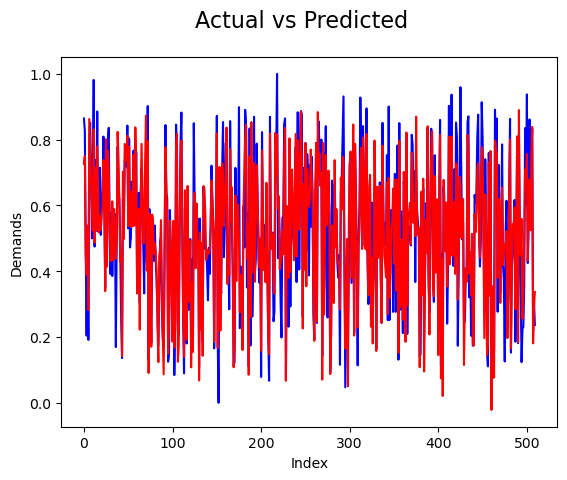

In [56]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_final),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- Actual and Predicted result following almost the same pattern

In [57]:
#Print R-squared Value
r2_score(y_train,y_train_cnt)

0.8223447786459568

### `Inference`
R-square for the predicted model is `0.822` which is same as we obtained for our final model as `0.822`

## Step 8: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [58]:
num_vars = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [59]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.485918
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.294305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.230028
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.475207
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.734848
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [60]:
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test[cols])

#### Predict values on the test data set

In [62]:
# Making predictions using the final model
y_pred_test = lr_final.predict(X_test_final)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred_test')

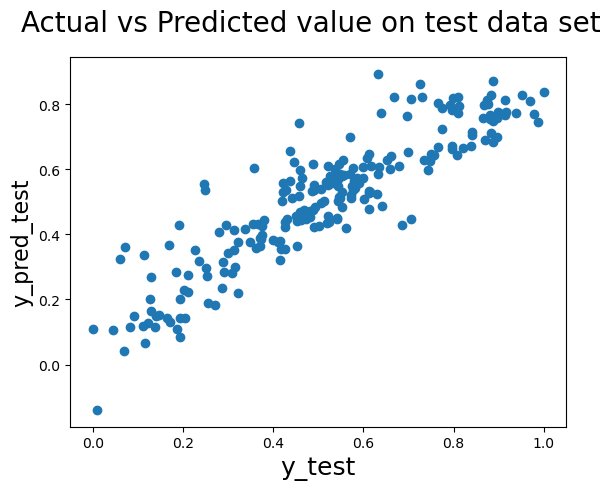

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('Actual vs Predicted value on test data set', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16)   

#### R-Squared value for test predictions

In [64]:
#Print R-squared Value
round (r2_score(y_test,y_pred_test),3)

0.807

##### `Inference` 
R2 value for predictions on test data `0.807` is almost similar as R2 value of train data `0.822`. This is a good R-squared value, hence we can see linear model is performing good even on unseen data (test data)

Text(0.5, 0, 'Errors')

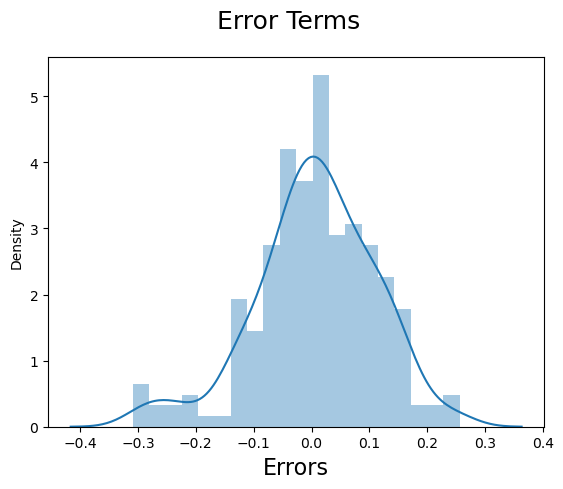

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label

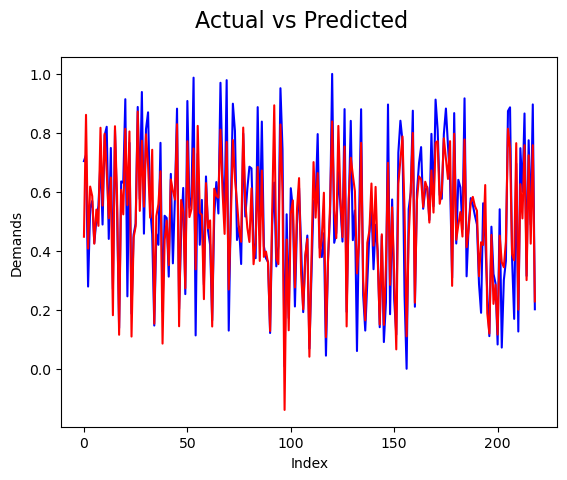

In [66]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test_final),1)]
plt.plot(c,y_test,  color="blue")
plt.plot(c,y_pred_test, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Error Terms

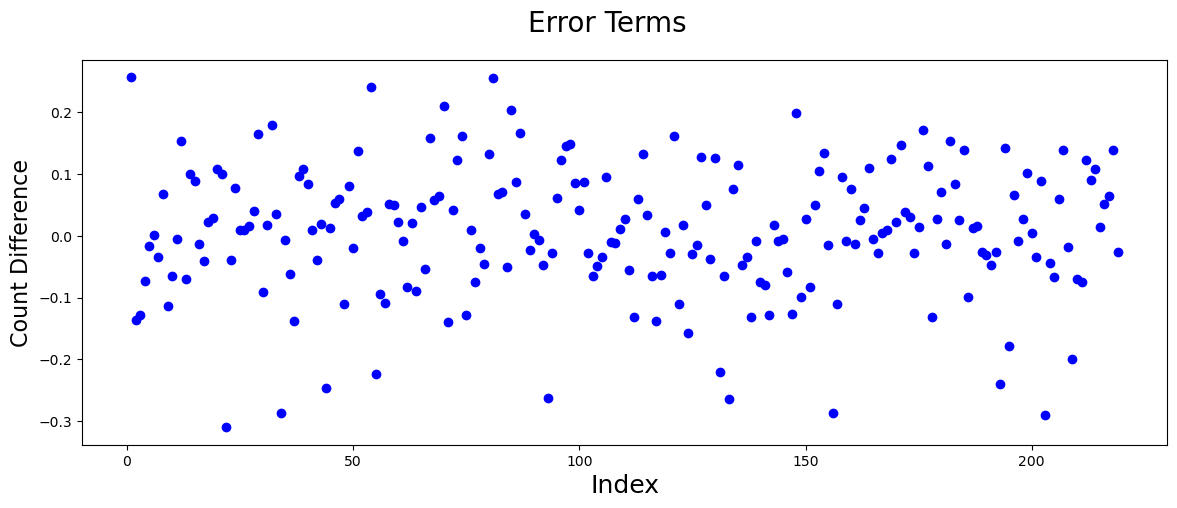

In [67]:
# Error terms
def err_terms(l1,l2):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,l1-l2, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Count Difference', fontsize=16)                # Y-label

err_terms(y_test,y_pred_test)

#### `Inference`
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [68]:
round(lr_final.params,3)

const                  0.199
yr                     0.233
temp                   0.471
season_spring         -0.113
season_winter          0.055
mnth_jul              -0.066
mnth_sept              0.061
weekday_sun           -0.045
weathersit_bad        -0.301
weathersit_moderate   -0.079
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.199 + 0.233  \times  yr + 0.471 \times temp - 0.113 \times season spring + 0.055 \times season winter - 0.066 \times mnth jul + 0.061 \times mnth sept - 0.045 \times weekday sun - 0.301 \times weathersit bad - 0.079 \times weathersit moderate $

## Step 10: Conclusion

### Analysing the above model, the company should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### Significant variables to predict the demand for shared bikes
- Year
- Temp
- Season (Spring, Winter)
- Months (July, September)
- Sunday
- Weathersit ( Light Snow, Mist + Cloudy)

### ---------------  *** End of file *** ---------------